## Polynomial Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('./data/usitc/tradeVariables-mxcan.csv')
dataset.shape

(24, 5)

In [3]:
dataset.head()

,year,exports,imports,travel_mx,travel_can
0,1996,5.468587e+10,7.296319e+10,276751448,153038903
1,1997,6.839322e+10,8.587234e+10,348661488,145512710
2,1998,7.536930e+10,9.470867e+10,366296614,142291790
3,1999,8.138074e+10,1.100000e+11,391959396,146497328
4,2000,1.000000e+11,1.360000e+11,392231869,147789673


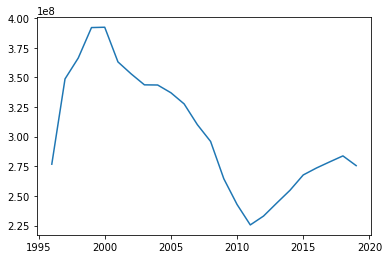

In [4]:
#travel visualization
plt.plot(dataset["year"],dataset["travel_mx"])

In [23]:
newdf = dataset[["exports","imports","travel_mx"]].copy()
newdf.shape

(24, 3)

In [38]:
newdf.head()

,exports,imports,travel_mx
0,5.468587e+10,7.296319e+10,276751448
1,6.839322e+10,8.587234e+10,348661488
2,7.536930e+10,9.470867e+10,366296614
3,8.138074e+10,1.100000e+11,391959396
4,1.000000e+11,1.360000e+11,392231869


In [7]:
X = newdf.iloc[:, :-2].values
y = newdf.iloc[:, 2].values

In [22]:
# matrix
print(X.shape) 

(24, 1)


In [37]:
print(X)

[[5.46858652e+10]
 [6.83932194e+10]
 [7.53693001e+10]
 [8.13807402e+10]
 [1.00000000e+11]
 [9.05374338e+10]
 [8.60760818e+10]
 [8.31080960e+10]
 [9.30177032e+10]
 [1.02000000e+11]
 [1.15000000e+11]
 [1.19000000e+11]
 [1.32000000e+11]
 [1.06000000e+11]
 [1.32000000e+11]
 [1.60000000e+11]
 [1.75000000e+11]
 [1.82000000e+11]
 [1.93000000e+11]
 [1.86000000e+11]
 [1.77000000e+11]
 [1.87000000e+11]
 [2.04000000e+11]
 [1.96000000e+11]]


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [10]:
# Fitting linear regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# Fitting polynomial regression to the dataset
# Note the new class that will be imported
from sklearn.preprocessing import PolynomialFeatures

# new matrix of features, x poly, and x^2 - x^n
# it will transform x into a new matrix
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)

# create a new linear regression object
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

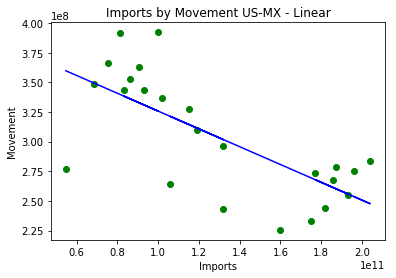

In [12]:
# Visualizing the linear regression results
plt.scatter(X, y, color="green")
plt.plot(X, lin_reg.predict(X), color="blue")
plt.title("Imports by Movement US-MX - Linear")
plt.xlabel("Imports")
plt.ylabel("Movement")
plt.show()

#Insight: linear regression doesn't work well here

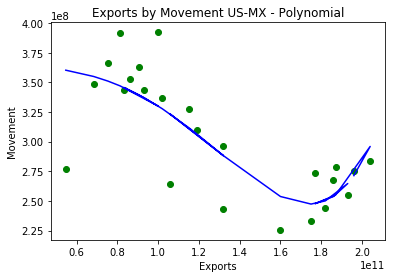

In [39]:
# Visualizing the Polynomial Regression Results
plt.scatter(X, y, color="green")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color="blue")
plt.title("Exports by Movement US-MX - Polynomial")
plt.xlabel("Exports")
plt.ylabel("Movement")
plt.show()

In [14]:
# Predicting the results for the average import levels: 2.07
dataset["imports"].describe()

count    2.400000e+01
mean     2.077727e+11
std      8.632668e+10
min      7.296319e+10
25%      1.357500e+11
50%      2.045000e+11
75%      2.842500e+11
max      3.580000e+11
Name: imports, dtype: float64

In [15]:
# Linear Option
lin_reg.predict([[2.077727e+11]])

array([2.44807907e+08])

In [16]:
# Polynomial Option
lin_reg_2.predict(poly_reg.fit_transform([[2.077727e+11]]))

array([3.11393762e+08])

## Extracting datapoints from figures

#### regression

In [18]:
# y-coordinate for line plot, regressor
poly_pred =  lin_reg_2.predict(poly_reg.fit_transform(X))
print(poly_pred)

[3.60233718e+08 3.54919718e+08 3.51025369e+08 3.46953844e+08
 3.29953373e+08 3.39422483e+08 3.43294424e+08 3.45656988e+08
 3.37103886e+08 3.27741221e+08 3.11784683e+08 3.06416598e+08
 2.88170208e+08 3.23110102e+08 2.88170208e+08 2.53707168e+08
 2.47333949e+08 2.50029862e+08 2.64651056e+08 2.53716243e+08
 2.47660866e+08 2.54912471e+08 2.95921534e+08 2.71323550e+08]


In [20]:
# Sorting the values
sorted(zip(poly_pred))

[(247333948.87788045,),
 (247660865.76691002,),
 (250029862.3666898,),
 (253707168.30555433,),
 (253716243.0289656,),
 (254912470.56843603,),
 (264651055.87475693,),
 (271323550.1746001,),
 (288170208.18756664,),
 (288170208.18756664,),
 (295921534.42742705,),
 (306416598.07566285,),
 (311784682.6455825,),
 (323110102.05560833,),
 (327741221.48519903,),
 (329953373.0371256,),
 (337103885.79613113,),
 (339422482.5917653,),
 (343294424.3080751,),
 (345656987.59816945,),
 (346953843.7472768,),
 (351025369.31222814,),
 (354919717.5159156,),
 (360233718.0649079,)]

In [30]:
# x-coordinate for line plot
x_coor = newdf.iloc[:, 0].values
print(x_coor)

[5.46858652e+10 6.83932194e+10 7.53693001e+10 8.13807402e+10
 1.00000000e+11 9.05374338e+10 8.60760818e+10 8.31080960e+10
 9.30177032e+10 1.02000000e+11 1.15000000e+11 1.19000000e+11
 1.32000000e+11 1.06000000e+11 1.32000000e+11 1.60000000e+11
 1.75000000e+11 1.82000000e+11 1.93000000e+11 1.86000000e+11
 1.77000000e+11 1.87000000e+11 2.04000000e+11 1.96000000e+11]


In [45]:
for x in x_coor:
    print("[",x,",")

[ 54685865249.0 ,
[ 68393219447.0 ,
[ 75369300051.0 ,
[ 81380740167.0 ,
[ 100000000000.0 ,
[ 90537433805.0 ,
[ 86076081837.0 ,
[ 83108095962.0 ,
[ 93017703250.0 ,
[ 102000000000.0 ,
[ 115000000000.0 ,
[ 119000000000.0 ,
[ 132000000000.0 ,
[ 106000000000.0 ,
[ 132000000000.0 ,
[ 160000000000.0 ,
[ 175000000000.0 ,
[ 182000000000.0 ,
[ 193000000000.0 ,
[ 186000000000.0 ,
[ 177000000000.0 ,
[ 187000000000.0 ,
[ 204000000000.0 ,
[ 196000000000.0 ,


In [27]:
# Sorting and organizing the values
sorted(zip(x_coor))

[(54685865249.0,),
 (68393219447.0,),
 (75369300051.0,),
 (81380740167.0,),
 (83108095962.0,),
 (86076081837.0,),
 (90537433805.0,),
 (93017703250.0,),
 (100000000000.0,),
 (102000000000.0,),
 (106000000000.0,),
 (115000000000.0,),
 (119000000000.0,),
 (132000000000.0,),
 (132000000000.0,),
 (160000000000.0,),
 (175000000000.0,),
 (177000000000.0,),
 (182000000000.0,),
 (186000000000.0,),
 (187000000000.0,),
 (193000000000.0,),
 (196000000000.0,),
 (204000000000.0,)]

##### training dataset


In [34]:
print(y)

[276751448 348661488 366296614 391959396 392231869 362991511 352870123
 343654239 343524676 336990567 327588026 310095754 295921230 264450245
 242776894 225541089 232999664 243982227 254746277 267663436 273532405
 278703002 283743197 275538145]


In [41]:
y_coor = newdf.iloc[:, 2].values
print(y_coor)

[276751448 348661488 366296614 391959396 392231869 362991511 352870123
 343654239 343524676 336990567 327588026 310095754 295921230 264450245
 242776894 225541089 232999664 243982227 254746277 267663436 273532405
 278703002 283743197 275538145]


In [43]:
for num in y_coor:
        print(num,"],")

276751448 ],
348661488 ],
366296614 ],
391959396 ],
392231869 ],
362991511 ],
352870123 ],
343654239 ],
343524676 ],
336990567 ],
327588026 ],
310095754 ],
295921230 ],
264450245 ],
242776894 ],
225541089 ],
232999664 ],
243982227 ],
254746277 ],
267663436 ],
273532405 ],
278703002 ],
283743197 ],
275538145 ],


In [28]:
# y vector is travel from the US-MX border to 
sorted(zip(y))

[(225541089,),
 (232999664,),
 (242776894,),
 (243982227,),
 (254746277,),
 (264450245,),
 (267663436,),
 (273532405,),
 (275538145,),
 (276751448,),
 (278703002,),
 (283743197,),
 (295921230,),
 (310095754,),
 (327588026,),
 (336990567,),
 (343524676,),
 (343654239,),
 (348661488,),
 (352870123,),
 (362991511,),
 (366296614,),
 (391959396,),
 (392231869,)]

## Using numpy methods

array([[5.46858652e+10, 3.60233718e+08],
       [6.83932194e+10, 3.54919718e+08],
       [7.53693001e+10, 3.51025369e+08],
       [8.13807402e+10, 3.46953844e+08],
       [1.00000000e+11, 3.29953373e+08],
       [9.05374338e+10, 3.39422483e+08],
       [8.60760818e+10, 3.43294424e+08],
       [8.31080960e+10, 3.45656988e+08],
       [9.30177032e+10, 3.37103886e+08],
       [1.02000000e+11, 3.27741221e+08],
       [1.15000000e+11, 3.11784683e+08],
       [1.19000000e+11, 3.06416598e+08],
       [1.32000000e+11, 2.88170208e+08],
       [1.06000000e+11, 3.23110102e+08],
       [1.32000000e+11, 2.88170208e+08],
       [1.60000000e+11, 2.53707168e+08],
       [1.75000000e+11, 2.47333949e+08],
       [1.82000000e+11, 2.50029862e+08],
       [1.93000000e+11, 2.64651056e+08],
       [1.86000000e+11, 2.53716243e+08],
       [1.77000000e+11, 2.47660866e+08],
       [1.87000000e+11, 2.54912471e+08],
       [2.04000000e+11, 2.95921534e+08],
       [1.96000000e+11, 2.71323550e+08]])

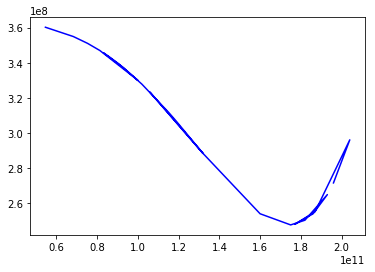

In [33]:
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color="blue")
ax = plt.gca()
line = ax.lines[0]

line.get_xydata()